# Importing Important Libraries

In [1]:
import pandas as pd
import numpy as np
import re

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

Loading dataset

In [2]:
true_df= pd.read_csv(r"C:\Users\pulki\TruthLens AI\data\True.csv")

In [3]:
fake_df= pd.read_csv(r"C:\Users\pulki\TruthLens AI\data\Fake.csv")

# Data Cleaning

1. Adding Labels 

In [4]:
true_df['label']= 0
fake_df['label']= 1

2. Merging datasets

In [5]:
df= pd.concat([true_df, fake_df], axis= 0)
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",0
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",0
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",0
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",0
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",0


In [6]:
df.isnull().sum()

title      0
text       0
subject    0
date       0
label      0
dtype: int64

No null values found in our dataset

3. Shuffling the datasets of True and Fake files

In [7]:
df= df.sample(frac=1, random_state= 12).reset_index(drop= True)
df.head()

,title,text,subject,date,label
0,UAE denounces U.S. recognition of Jerusalem as...,DUBAI (Reuters) - The United Arab Emirates has...,worldnews,"December 7, 2017",0
1,"Trump Whines About Fake News, CNN’s Chris Cuo...","By now, we re all sick and tired of hearing Do...",News,"February 15, 2017",1
2,Czechs pin hopes on billionaire Babis to fix t...,PRAGUE (Reuters) - The traffic jams and roadwo...,worldnews,"October 12, 2017",0
3,LOCAL REPORTER IN DEEP BLUE STATE Stuns Libera...,"We took a very hard look at these numbers, an...",politics,17-Feb-18,1
4,Highlights: The Trump presidency on April 21 a...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"April 21, 2017",0


4. Keeping useful columns

In [8]:
df= df[['title', 'label']]
df.head()

,title,label
0,UAE denounces U.S. recognition of Jerusalem as...,0
1,"Trump Whines About Fake News, CNN’s Chris Cuo...",1
2,Czechs pin hopes on billionaire Babis to fix t...,0
3,LOCAL REPORTER IN DEEP BLUE STATE Stuns Libera...,1
4,Highlights: The Trump presidency on April 21 a...,0


In [9]:
corpus= []

for i in range(len(df)):
    review= re.sub('[^a-zA-Z]', ' ', df['title'][i])
    review= review.lower()
    corpus.append(review)

Applying Tokenization

In [10]:
vocab_size= 10000

In [11]:
onehot_repr= [one_hot(words, vocab_size) for words in corpus]

Applying Padding

In [12]:
sent_length= 50

In [13]:
embedded_docs= pad_sequences(onehot_repr, padding= 'pre', maxlen= sent_length)
embedded_docs

array([[   0,    0,    0, ..., 7953, 9137, 8254],
       [   0,    0,    0, ..., 7530, 5610, 5180],
       [   0,    0,    0, ..., 4083, 1064, 3121],
       ...,
       [   0,    0,    0, ..., 7137, 7731, 3790],
       [   0,    0,    0, ..., 2854, 1064, 2483],
       [   0,    0,    0, ..., 9630, 9056, 3644]],
      shape=(44898, 50), dtype=int32)

In [14]:
embedded_docs.shape

(44898, 50)

In [15]:
X= np.array(embedded_docs)
y= np.array(df['label'])

Applying Train-Test split

In [16]:
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state= 12)

Building LSTM Model

In [17]:

model= Sequential()

model.add(Embedding(vocab_size, 100, input_length= sent_length))
model.add(LSTM(100))
model.add(Dense(1, activation= 'sigmoid'))
model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
model.summary()

C:\Users\pulki\miniconda3\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs= 5, batch_size= 64)

Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 65s 105ms/step - accuracy: 0.9395 - loss: 0.1516 - val_accuracy: 0.9622 - val_loss: 0.0977
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 77s 97ms/step - accuracy: 0.9798 - loss: 0.0570 - val_accuracy: 0.9644 - val_loss: 0.0954
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 53s 94ms/step - accuracy: 0.9895 - loss: 0.0303 - val_accuracy: 0.9622 - val_loss: 0.1363
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 55s 97ms/step - accuracy: 0.9932 - loss: 0.0183 - val_accuracy: 0.9640 - val_loss: 0.1381
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 82s 97ms/step - accuracy: 0.9965 - loss: 0.0113 - val_accuracy: 0.9611 - val_loss: 0.1591


Evaluating the model

In [19]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score, precision_score, recall_score

In [20]:
lstm_loss, lstm_accuracy= model.evaluate(X_test, y_test)

281/281 ━━━━━━━━━━━━━━━━━━━━ 6s 21ms/step - accuracy: 0.9611 - loss: 0.1591


In [21]:
y_pred= model.predict(X_test)
y_pred= (y_pred > 0.5).astype(int)

281/281 ━━━━━━━━━━━━━━━━━━━━ 7s 22ms/step


In [22]:
# Confusion Matrix
cm= confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", cm)

Confusion Matrix:
 [[4036  206]
 [ 143 4595]]


In [23]:
LSTM_accuracy_score= accuracy_score(y_test, y_pred)

In [24]:
print(f"LSTM_F1_Score {f1_score(y_test, y_pred)}")

LSTM_F1_Score 0.9634133556976622


In [25]:
print(f"LSTM_Precision {precision_score(y_test, y_pred)}")

LSTM_Precision 0.957092272443241


In [26]:
print(f"LSTM_Recall {recall_score(y_test, y_pred)}")

LSTM_Recall 0.9698184888138455


In [27]:
y_pred_prob= model.predict(X_test)

281/281 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step


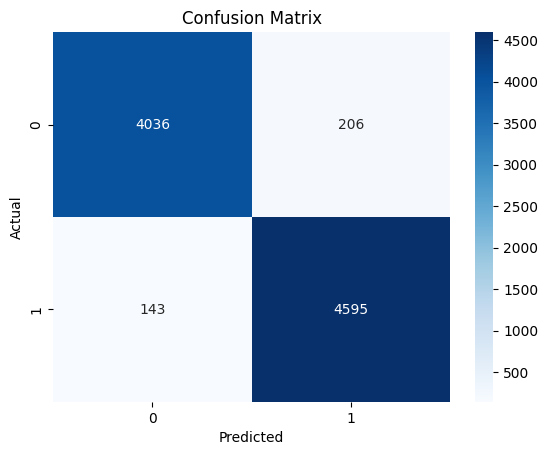

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(cm, annot= True, fmt= 'd', cmap= 'Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [29]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(y_test, y_pred_prob)

In [30]:
roc_curve= auc(fpr, tpr)

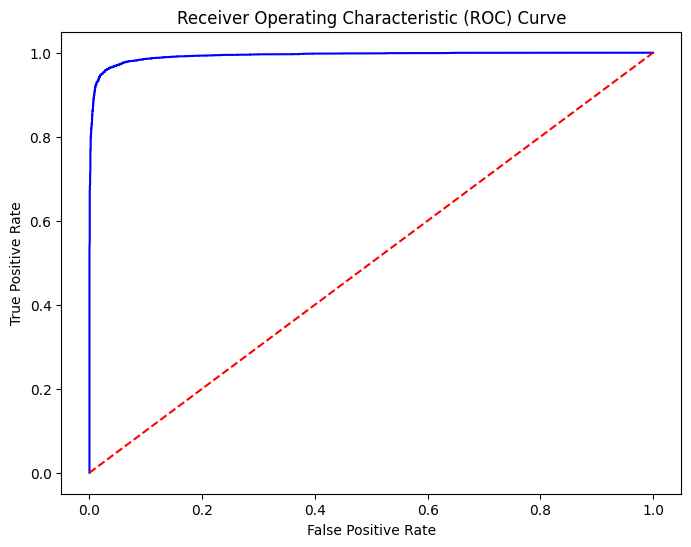

In [31]:
plt.figure(figsize= (8, 6))
plt.plot(fpr, tpr, color= 'blue', label= f'ROC Curve (AUC = {roc_curve:.2f})')
plt.plot([0,1], [0,1], color= 'red', linestyle= '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

In [33]:
X_train_text, X_test_text, y_train, y_test= train_test_split(corpus, df['label'], test_size= 0.2, random_state= 12)

In [34]:
tfidf= TfidfVectorizer(max_features= 5000)

X_train_tfidf= tfidf.fit_transform(X_train_text)
X_test_tfidf= tfidf.transform(X_test_text)

In [35]:
lr_model= LogisticRegression()
lr_model.fit(X_train_tfidf, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

In [36]:
y_pred_lr= lr_model.predict(X_test_tfidf)

In [37]:
print("Accuracy", accuracy_score(y_test, y_pred_lr))

print("\nClassification Report:\n", classification_report(y_test, y_pred_lr))

print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))

Accuracy 0.9527839643652561

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.96      0.95      4242
           1       0.97      0.94      0.95      4738

    accuracy                           0.95      8980
   macro avg       0.95      0.95      0.95      8980
weighted avg       0.95      0.95      0.95      8980


Confusion Matrix:
 [[4092  150]
 [ 274 4464]]


Bidirectional LSTM Model

In [38]:
from tensorflow.keras.layers import Bidirectional

bilstm_model= Sequential()

In [39]:
bilstm_model.add(Embedding(vocab_size, 100, input_length= sent_length))
bilstm_model.add(Bidirectional(LSTM(100)))
bilstm_model.add(Dense(1, activation= 'sigmoid'))

bilstm_model.compile(loss= 'binary_crossentropy', optimizer= 'adam', metrics= ['accuracy'])
bilstm_model.summary()

C:\Users\pulki\miniconda3\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)              │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
X = np.array(embedded_docs)
y = np.array(df['label'])

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

X_train = X_train.astype('int32')
X_test = X_test.astype('int32')

In [41]:
print(X_train.shape)
print(X_train.dtype)
print(y_train.shape)
print(type(y_train))

(35918, 50)
int32
(35918,)
<class 'numpy.ndarray'>


In [42]:
history_bilstm= bilstm_model.fit(X_train, y_train, validation_data= (X_test, y_test), epochs= 5, batch_size= 64)

Epoch 1/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 81s 131ms/step - accuracy: 0.9392 - loss: 0.1513 - val_accuracy: 0.9633 - val_loss: 0.0952
Epoch 2/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 71s 126ms/step - accuracy: 0.9789 - loss: 0.0581 - val_accuracy: 0.9684 - val_loss: 0.0910
Epoch 3/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 82s 125ms/step - accuracy: 0.9898 - loss: 0.0298 - val_accuracy: 0.9668 - val_loss: 0.1136
Epoch 4/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 71s 127ms/step - accuracy: 0.9947 - loss: 0.0164 - val_accuracy: 0.9675 - val_loss: 0.1365
Epoch 5/5
562/562 ━━━━━━━━━━━━━━━━━━━━ 71s 126ms/step - accuracy: 0.9961 - loss: 0.0118 - val_accuracy: 0.9608 - val_loss: 0.1508


In [43]:
bilstm_loss, bilstm_accuracy= bilstm_model.evaluate(X_test, y_test)

281/281 ━━━━━━━━━━━━━━━━━━━━ 8s 28ms/step - accuracy: 0.9608 - loss: 0.1508


In [44]:
y_pred_bilstm= bilstm_model.predict(X_test)
y_pred_bilstm= (y_pred_bilstm > 0.5).astype(int)

281/281 ━━━━━━━━━━━━━━━━━━━━ 9s 29ms/step


In [45]:
print("Accuracy:", accuracy_score(y_test, y_pred_bilstm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_bilstm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_bilstm))

Accuracy: 0.9608017817371938

Confusion Matrix:
 [[4033  222]
 [ 130 4595]]

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      4255
           1       0.95      0.97      0.96      4725

    accuracy                           0.96      8980
   macro avg       0.96      0.96      0.96      8980
weighted avg       0.96      0.96      0.96      8980



In [46]:
print("LSTM Accuracy:", LSTM_accuracy_score)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Bidirectional LSTM Accuracy:", bilstm_accuracy)

LSTM Accuracy: 0.9611358574610245
Logistic Regression Accuracy: 0.5021158129175947
Bidirectional LSTM Accuracy: 0.9608017802238464


Comparison between the above three models we used- LSTM, Logistic Regression and Bidirectional LSTM

In [47]:
comparison= pd.DataFrame({
    'Model': ['LSTM', 'Logistic Regression', 'Bidirectional LSTM'],
    'Accuracy': [LSTM_accuracy_score, accuracy_score(y_test, y_pred_lr), bilstm_accuracy],
})

print("\nModel Comparison:")
print(comparison)


Model Comparison:
                 Model  Accuracy
0                 LSTM  0.961136
1  Logistic Regression  0.502116
2   Bidirectional LSTM  0.960802


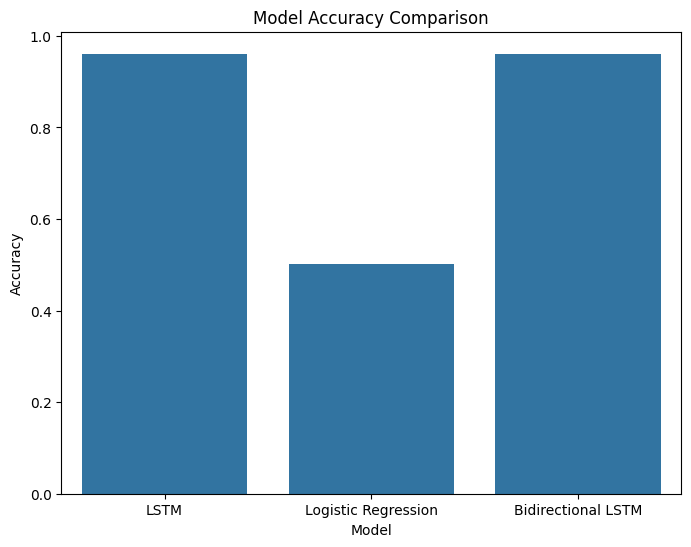

In [48]:
plt.figure(figsize= (8, 6))
sns.barplot(x= 'Model', y= 'Accuracy', data= comparison)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

# Conclusion

- Implemented three approaches for fake news classification:
TF-IDF + Logistic Regression, LSTM, and Bidirectional LSTM.

- Logistic Regression with TF-IDF provided a strong and efficient baseline, demonstrating that classical machine learning remains highly competitive in structured NLP tasks.

- The LSTM model captured sequential dependencies within text, enabling deeper contextual understanding compared to traditional vector-based models.

- Bidirectional LSTM further improved contextual learning by processing sequences in both forward and backward directions, allowing richer semantic representation.

- Comparative evaluation showed that while deep learning models offer enhanced language modeling capabilities, classical approaches can still achieve strong performance with proper feature engineering.

- This project demonstrates a complete NLP pipeline including preprocessing, feature engineering, deep learning modeling, evaluation, and comparative analysis.